In [22]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from moviepy.audio.io.AudioFileClip import AudioFileClip

In [23]:
# load an prepare song of choice
song_path = 'inputs'

In [24]:

def convert_to_wav(old_song_path, new_song_path):
    # Load the song file using AudioFileClip
    audio_clip = AudioFileClip(old_song_path)
    
    # Write to .wav format
    audio_clip.write_audiofile(new_song_path)

#CQT
def extract_features(audio_file_path):
    y, sr = librosa.load(audio_file_path, sr=22050, mono=True)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, hop_length=512)  # Chroma representation
    time_steps = librosa.times_like(chroma[0], sr=sr)  # Get time axis for spectrogram
    return chroma, time_steps


MoviePy - Writing audio in inputs/processed/song.wav


MoviePy - Done.


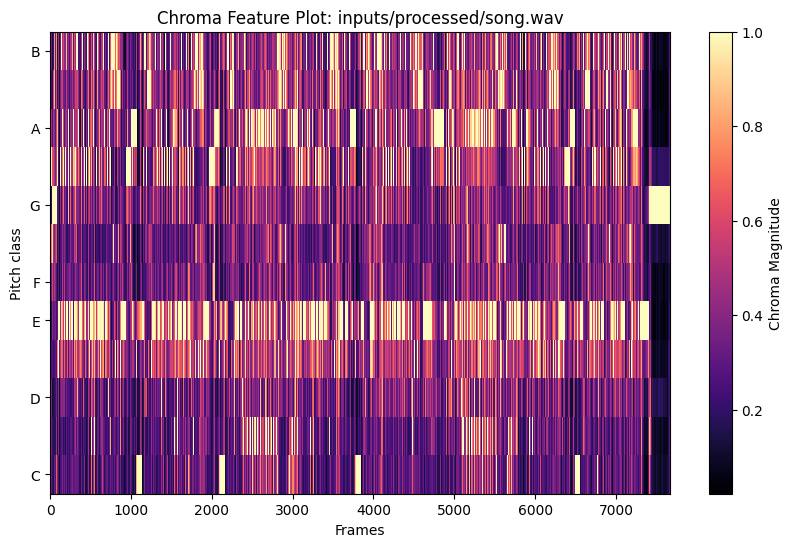

In [26]:
# Convert the song to .wav format   

for file in os.listdir(song_path):
    old_file = file
    if file.endswith('.mid'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.mp3'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.wav'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.flac'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file), new_song)
        break
    elif file.endswith('.ogg'):
        new_song = os.path.join(os.path.join(song_path, 'processed'), 'song.wav')
        convert_to_wav(os.path.join(song_path, file))
        break
    else :
        print('Invalid file format')
        break

# Extract chroma features
chroma, sr = extract_features(new_song)

# Plotting the chroma features
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma, x_axis='frames', y_axis='chroma', sr=sr)
plt.colorbar(label='Chroma Magnitude')
plt.title(f'Chroma Feature Plot: {new_song}')
plt.show()


In [27]:
# Load the trained model
model = tf.keras.models.load_model('accordo_ai_model.keras', compile=False)
    
# Reshape input chroma features to match model's expected input shape
X_input_sample = chroma.T  # Shape: (time_steps, 12)

# Define the fixed sequence length
seq_length = 300
hop_length = 512
sample_rate = 22050

# Calculate the time duration of each timestep
time_per_timestep = hop_length / sample_rate

# Process input in overlapping chunks of 300 time steps
predictions_root = []
predictions_bass = []
predictions_triad = []
predictions_fourth = []

predicted_chord_vector = []

for i in range(0, X_input_sample.shape[0] - seq_length + 1, seq_length):
    chunk = X_input_sample[i : i + seq_length]  # Take a 300-time-step chunk
    chunk = np.expand_dims(chunk, axis=0)  # Add batch dimension (1, 300, 12)
    
    # Predict using the model
    predictions = model.predict(chunk, verbose=0)
    
    # Store the predicted outputs
    predictions_root.append(np.argmax(predictions[0], axis=-1))
    predictions_bass.append(np.argmax(predictions[1], axis=-1))
    predictions_triad.append(np.argmax(predictions[2], axis=-1))
    predictions_fourth.append(np.argmax(predictions[3], axis=-1))

    # Convert predictions into a single array
    predicted_root = np.concatenate(predictions_root)
    predicted_bass = np.concatenate(predictions_bass)
    predicted_triad = np.concatenate(predictions_triad)
    predicted_fourth = np.concatenate(predictions_fourth)

    # print(i)
    
    for j in range(seq_length):
        timestep = i + j
        time_in_seconds = timestep * time_per_timestep  # Convert timestep index to seconds
        root_pred = int(predicted_root[0][j])
        bass_pred = int(predicted_bass[0][j])
        triad_pred = int(predicted_triad[0][j])
        fourth_pred = int(predicted_fourth[0][j])
    
        # Print the predictions for each timestep, along with the time in seconds
        print(f"Timestep {timestep} ({time_in_seconds:.2f} seconds): [Root: {root_pred}, Bass: {bass_pred}, Triad: {triad_pred}, Fourth: {fourth_pred}]")
        predicted_chord_vector.append([round(time_in_seconds, 4), [root_pred, bass_pred, triad_pred, fourth_pred]])


chordsdf = pd.DataFrame(predicted_chord_vector, columns=['timestep', 'Chord_vector'])
print(chordsdf)

Timestep 0 (0.00 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 1 (0.02 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 2 (0.05 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 3 (0.07 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 4 (0.09 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 5 (0.12 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 6 (0.14 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 7 (0.16 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 8 (0.19 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 9 (0.21 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 10 (0.23 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 11 (0.26 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 12 (0.28 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 13 (0.30 seconds): [Root: 12, Bass: 12, Triad: 0, Fourth: 4]
Timestep 14 (0.33 seconds): [R

In [28]:
# Define categories (merging 'X' into 'N')
roots = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'N', 'X']
basses = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'N', 'X']
triads = ['Major', 'Minor', 'Diminished', 'Augmented', 'Sus2', 'Sus4', 'N', 'X']
fourths = ['dim7', 'min7', 'maj7', 'maj6', 'N', 'X']

def vector_to_chord(vector):

    chord_vocab_file = "IsoDatasetPro/chord_vocabulary_12_keys.csv"
    chord_vocab_df = pd.read_csv(chord_vocab_file)
    """
    Convert a vector of indices back to a chord label (e.g., [0, 0, 0, 1] -> 'C:maj7')
    by referring to the chord vocabulary DataFrame.
    """
    root_index, bass_index, triad_index, fourth_index = vector

    # Convert indices back to values using the corresponding arrays
    root_value = roots[root_index]
    bass_value = basses[bass_index]
    triad_value = triads[triad_index]
    fourth_value = fourths[fourth_index]

    # Find the corresponding row in the chord vocabulary
    chord_row = chord_vocab_df[
        (chord_vocab_df['root'] == root_value) &
        (chord_vocab_df['bass'] == bass_value) &
        (chord_vocab_df['triad'] == triad_value) &
        (chord_vocab_df['fourth'] == fourth_value)
    ]

    if chord_row.empty:
        # print(f"Chord with values ({root_value}, {bass_value}, {triad_value}, {fourth_value}) not found in the chord vocabulary.")
        print('Error')
        return 'N'
    else :
        # Return the chord label
        print(chord_row['chord_name'].values[0])
        return chord_row['chord_name'].values[0]

In [29]:
chordsdf['Chord_label'] = chordsdf['Chord_vector'].apply(vector_to_chord)
print(chordsdf)


Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:maj
E:ma

In [18]:

chordsdf.to_csv('Outputs/chords.csv')